In [1]:
from libraries import*
from functions import fourier3, fourier5

Welcome to JupyROOT 6.26/06
iminuit version: 2.17.0


    Angle   Peak1    Peak2    Peak3
0     0.0   2.180  -2.7500  -7.6200
1     2.0   3.480   0.5580  -0.9200
2    10.0   7.450   3.3900  -0.6000
3    20.0  10.750   7.7000   5.2200
4    30.0  11.860   9.6900   9.6900
5    40.0  10.710  10.7100  10.7100
6    50.0   7.670   8.4100   9.8500
7    60.0   1.870   4.1000   6.5300
8    70.0  -5.004  -2.0258   1.0056
9    80.0 -12.380  -9.1500  -6.0600
10   90.0 -14.967 -13.4700 -13.4700
11  100.0 -24.210 -22.2700 -19.8700
12  110.0 -26.470 -25.5400 -25.5400
13  120.0 -28.286 -28.2860 -28.2860
14  130.0 -26.260 -28.3600 -29.5300
15  140.0 -22.540 -25.8000 -28.6100
16  150.0 -17.250 -21.5500 -25.3990
17  160.0 -11.250 -16.0750 -20.6810
18  170.0  -4.648  -9.7840 -14.3740
19  180.0   1.698  -2.9230  -7.5400
20  190.0   6.830   2.6700  -1.0200
21  200.0  10.096   7.4830   5.0300
22  210.3  11.580  10.1860   9.5300
23  220.0  10.890  10.8900  10.8900
24  230.0   7.670   8.6760  10.1250
25  240.0   2.190   4.4640   6.8999
26  250.0  -4.810  -1.9260  

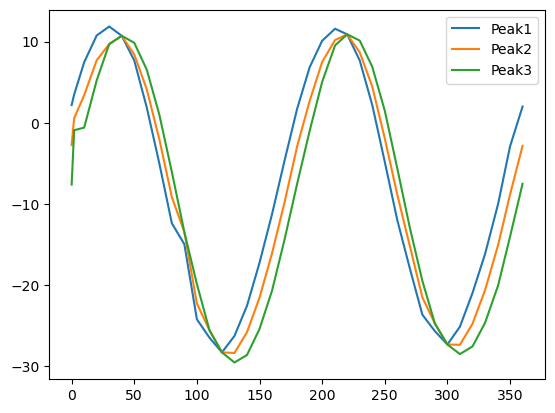

In [3]:
text = ['z rotation', 'y rotation', 'x rotation']
df = [0]*3
for i in range(len(text)):
    df[i] = pd.read_excel('/home/shiva/WMU/PhD/Data/B_xrotation_set1.xlsx', skiprows=[1])
    print(df[i])
    plt.plot(df[i].Angle, df[i].Peak1, label = 'Peak1')
    plt.plot(df1.Angle, df1.Peak2, label = 'Peak2')
    plt.plot(df1.Angle, df1.Peak3, label = 'Peak3')
    plt.legend()

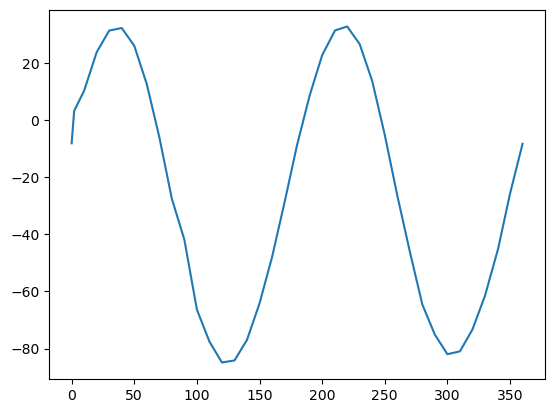

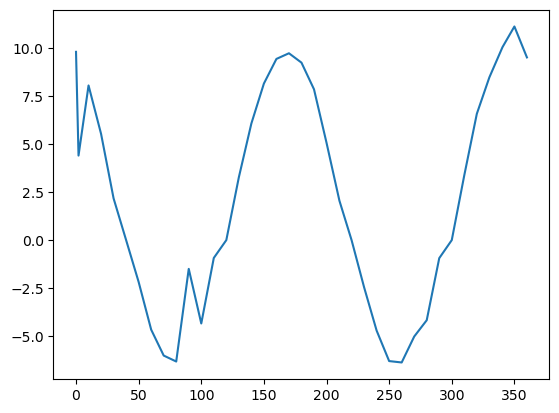

In [4]:
freq_sum = df1.Peak1 + df1.Peak2 + df1.Peak3
freq_diff = df1.Peak1 - df1.Peak3
plt.plot(df1.Angle, freq_sum)
plt.show()
plt.plot(df1.Angle, freq_diff)

┌───┬──────────────────────────────────────────────┐
│   │        a        b        c        d        e │
├───┼──────────────────────────────────────────────┤
│ a │        1  -0.0657 -0.00305   -0.066 -0.00444 │
│ b │  -0.0657        1 -0.00321  -0.0958 -0.00555 │
│ c │ -0.00305 -0.00321        1 -0.00111 0.000739 │
│ d │   -0.066  -0.0958 -0.00111        1 -0.00411 │
│ e │ -0.00444 -0.00555 0.000739 -0.00411        1 │
└───┴──────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.163e+04 (chi2/ndof = 352.4)│              Nfcn = 171              │
│ EDM = 2.84e-20 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limi

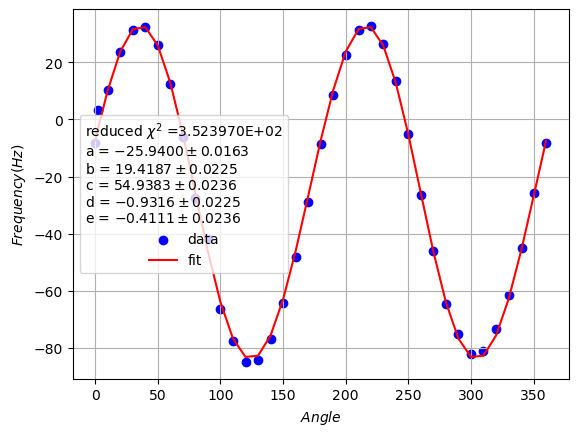

a = -25.940043639279562
b = 19.418708656197673
c = 54.93829945664295
d = -0.931641179016789
e = -0.41106066631816857


In [5]:

# titles = ['Z rotation', 'Y rotation', 'X rotation']
least_squares = LeastSquares(df1.Angle, freq_sum, 0.1,fourier5)
    
m_s = Minuit(least_squares, a = 1, b = 1, c= 1, d = 0, e = 1).migrad()
# m[i] = m[i].scan(ncall = 50)

# m[i].migrad()  # finds minimum of least_squares function
m_s.hesse()   # accurately computes uncertainties

fit_info = [
    f"reduced $\\chi^2$ ={(m_s.fval / (len(df1.Angle) - m_s.nfit)):5E}"
]
# print(fit_info)

for p, v, e in zip(m_s.parameters, m_s.values, m_s.errors):
    fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

corr_mat = (m_s.covariance.correlation())
print(corr_mat)
print(m_s.migrad())
# plt.imshow(corr_mat, cmap='coolwarm')

# draw data and fitted line
plt.scatter(df1.Angle, freq_sum, label="data", color = 'blue')
plt.plot(df1.Angle, fourier5(df1.Angle, *m_s.values), label="fit", color = 'red')
plt.xlabel(r'$Angle$')
plt.ylabel(r'$Frequency (Hz)$')
# plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
# plt.title(titles[i])
plt.legend(title="\n".join(fit_info))
plt.grid()
plt.show()

for key, value in zip(m_s.parameters, m_s.values):
    print(f"{key} = {value}")

┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │        1  -0.0725 -0.00313 │
│ b │  -0.0725        1 -0.00333 │
│ c │ -0.00313 -0.00333        1 │
└───┴────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4302 (chi2/ndof = 122.9)   │              Nfcn = 87               │
│ EDM = 1.46e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬─────────

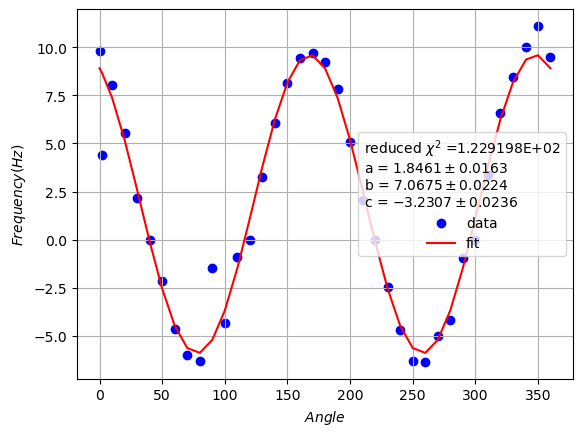

a = 1.846111413310993
b = 7.067470570186626
c = -3.2306782048505243


In [7]:

# titles = ['Z rotation', 'Y rotation', 'X rotation']
least_squares = LeastSquares(df1.Angle, freq_diff, 0.1,fourier3)
    
m_s = Minuit(least_squares, a = 1, b = 1, c= 1).migrad()
# m[i] = m[i].scan(ncall = 50)

# m[i].migrad()  # finds minimum of least_squares function
m_s.hesse()   # accurately computes uncertainties

fit_info = [
    f"reduced $\\chi^2$ ={(m_s.fval / (len(df1.Angle) - m_s.nfit)):5E}"
]
# print(fit_info)

for p, v, e in zip(m_s.parameters, m_s.values, m_s.errors):
    fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

corr_mat = (m_s.covariance.correlation())
print(corr_mat)
print(m_s.migrad())
# plt.imshow(corr_mat, cmap='coolwarm')

# draw data and fitted line
plt.scatter(df1.Angle, freq_diff, label="data", color = 'blue')
plt.plot(df1.Angle, fourier3(df1.Angle, *m_s.values), label="fit", color = 'red')
plt.xlabel(r'$Angle$')
plt.ylabel(r'$Frequency (Hz)$')
# plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
# plt.title(titles[i])
plt.legend(title="\n".join(fit_info))
plt.grid()
plt.show()

for key, value in zip(m_s.parameters, m_s.values):
    print(f"{key} = {value}")